<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#그레이디언트 계산하기

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
# For reproducibility
np.random.seed(1000)

nb_points = 100

In [0]:
# Create the dataset
X = np.linspace(-nb_points, nb_points, 200, dtype=np.float32)

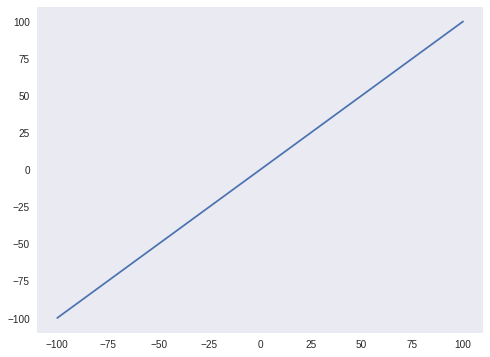

In [65]:
# Plot the dataset
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, X)
ax.grid()
plt.show()

In [66]:
# Create the graph
graph = tf.Graph()

with graph.as_default():
    Xt = tf.placeholder(tf.float32, shape=(None, 1), name='x')
    Y = tf.pow(Xt, 3.0, name='x_3')
    Yd = tf.gradients(Y, Xt, name='dx')
    Yd2 = tf.gradients(Yd, Xt, name='d2x')

session = tf.InteractiveSession(graph=graph)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
# Compute the gradients
X2, dX, d2X = session.run([Y, Yd, Yd2], feed_dict={Xt: X.reshape((nb_points * 2, 1))})

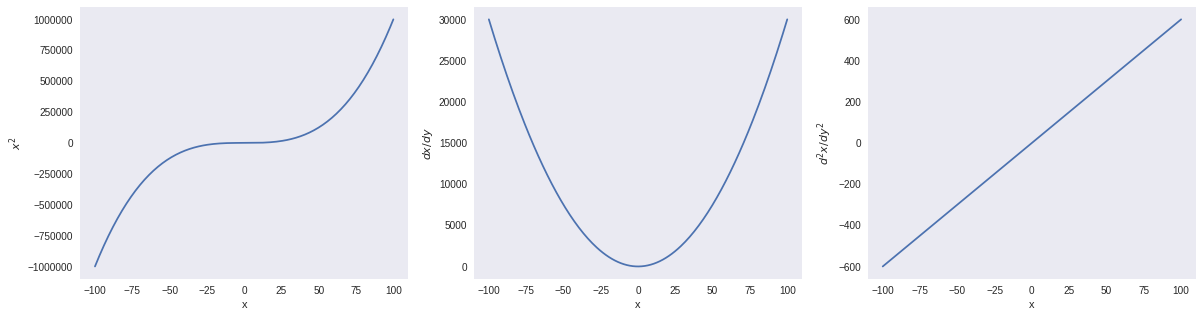

In [68]:
# Plot the gradients
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].plot(X, X2)
ax[0].grid()
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$x^2$')

ax[1].plot(X, dX[0])
ax[1].grid()
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$dx/dy$')

ax[2].plot(X, d2X[0])
ax[2].grid()
ax[2].set_xlabel('x')
ax[2].set_ylabel(r'$d^2x/dy^2$')

plt.show()